In [31]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
data = pd.read_csv('agaricus-lepiota.data',header=None,delimiter=',')

In [11]:
data.shape
# data consists of 23 columns and 8124 rows

(8124, 23)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
0     8124 non-null object
1     8124 non-null object
2     8124 non-null object
3     8124 non-null object
4     8124 non-null object
5     8124 non-null object
6     8124 non-null object
7     8124 non-null object
8     8124 non-null object
9     8124 non-null object
10    8124 non-null object
11    8124 non-null object
12    8124 non-null object
13    8124 non-null object
14    8124 non-null object
15    8124 non-null object
16    8124 non-null object
17    8124 non-null object
18    8124 non-null object
19    8124 non-null object
20    8124 non-null object
21    8124 non-null object
22    8124 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [16]:
# Renaming the columns
column_labels = ['class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]

data.columns = column_labels

In [17]:
data.columns

Index(['class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
       'gill attachment', 'gill spacing', 'gill size', 'gill color',
       'stalk shape', 'stalk root', 'stalk surface above ring',
       'stalk surface below ring', 'stalk color above ring',
       'stalk color below ring', 'veil type', 'veil color', 'ring number',
       'ring type', 'spore print color', 'population', 'habitat'],
      dtype='object')

In [20]:
data['class'].value_counts()
# e : edible mushroom
# p : poisonous mushroom

e    4208
p    3916
Name: class, dtype: int64

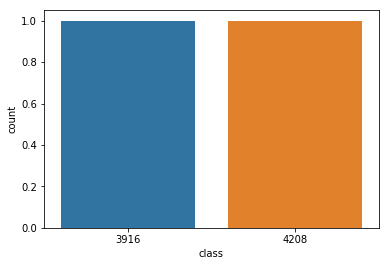

In [19]:
# Class value counts
sns.countplot(data['class'].value_counts())

# Classes are balanced so we dont need to work on upsampling/downsampling

# Preprocessing

In [22]:
# Encoding categorical variables
X = data.loc[:, data.columns != 'class']
y = data['class'].to_frame()

In [25]:
X_enc = pd.get_dummies(X)
X_enc.head()

,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
# Standardizing the independant variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X_enc)

In [29]:

# Encode the class labels in the target variable
le = LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())

In [32]:
# Prepare the training and test sets using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_std,
    y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42    
)

In [33]:
# Train a logistic regression classifer using the training set
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)

# Compute the F1 score
metrics.f1_score(y_test, y_pred)

1.0

In [36]:
# Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

# We dont see any False positives or false negetives so out model fits well with the data

array([[842,   0],
       [  0, 783]], dtype=int64)

In [37]:
y_test

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [39]:
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)